In [1]:
from useful_scit.imps import *

In [2]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../../')
import sara_cluster.util as scu
from sara_cluster.util import *
import useful_scit.plot.plot as ucp

In [3]:
data_path = '../data/raw/Original_eq.20_2.nc'

In [4]:
ds = xr.open_dataset(data_path)

In [5]:
hyam     = 'hyam'
hybm     = 'hybm'
hyai     = 'hyai'
hybi     = 'hybi'
date     = 'date'
gw       = 'gw'
LANDFRAC = 'LANDFRAC'
NCONC01  = 'NCONC01'
PS       = 'PS'
lat_wg   = 'lat_wg'
NMR01    = 'NMR01'
COAGNUCL = 'COAGNUCL'
H2SO4    = 'H2SO4'
SOA_LV   = 'SOA_LV'

cols = [
    NCONC01  ,
    NMR01    ,
    H2SO4    ,
    COAGNUCL ,
    SOA_LV   ,
]

time ='time'
lev  ='lev'
lat  ='lat'
lon  ='lon'

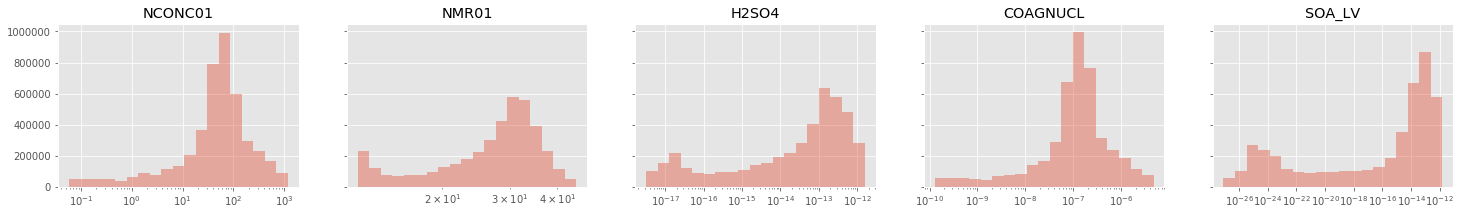

In [6]:
hist_better_mult(ds,cols)

In [7]:
df = ds[cols].to_dataframe()

In [8]:
dfr = df.reset_index([lat,lev,lon])

In [9]:
from sklearn.preprocessing import QuantileTransformer

In [10]:
qts = {}
df1 = df.copy()
for c in cols:
    qt = QuantileTransformer()
    data = qt.fit_transform(df[c].values.reshape(-1,1))
    df1[c]=data.flatten()
    qts[c]= qt

In [11]:
from sklearn.cluster import KMeans

In [12]:
c2 = cols
n_c = 10
kmean = KMeans(n_clusters=n_c, random_state=0)

In [13]:
from random import sample 

In [14]:
df2 = _df = df1[c2].dropna().copy()
sam = sample(range(len(_df)),int(len(_df)/10))
dfs = _df.iloc[sam].copy()

kmean.fit(dfs.values)

labs = kmean.predict(df2)

In [15]:
la = 'labs'
df2[la] = labs

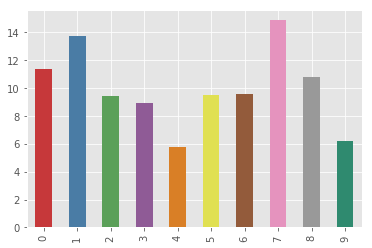

In [16]:
_df = df2[la].value_counts().sort_index()
_df = _df/_df.sum()*100
_df.plot.bar(color=ucp.cc);

In [17]:
_df = df2.reset_index(drop=True)
_df[la]=_df[la].astype(str)

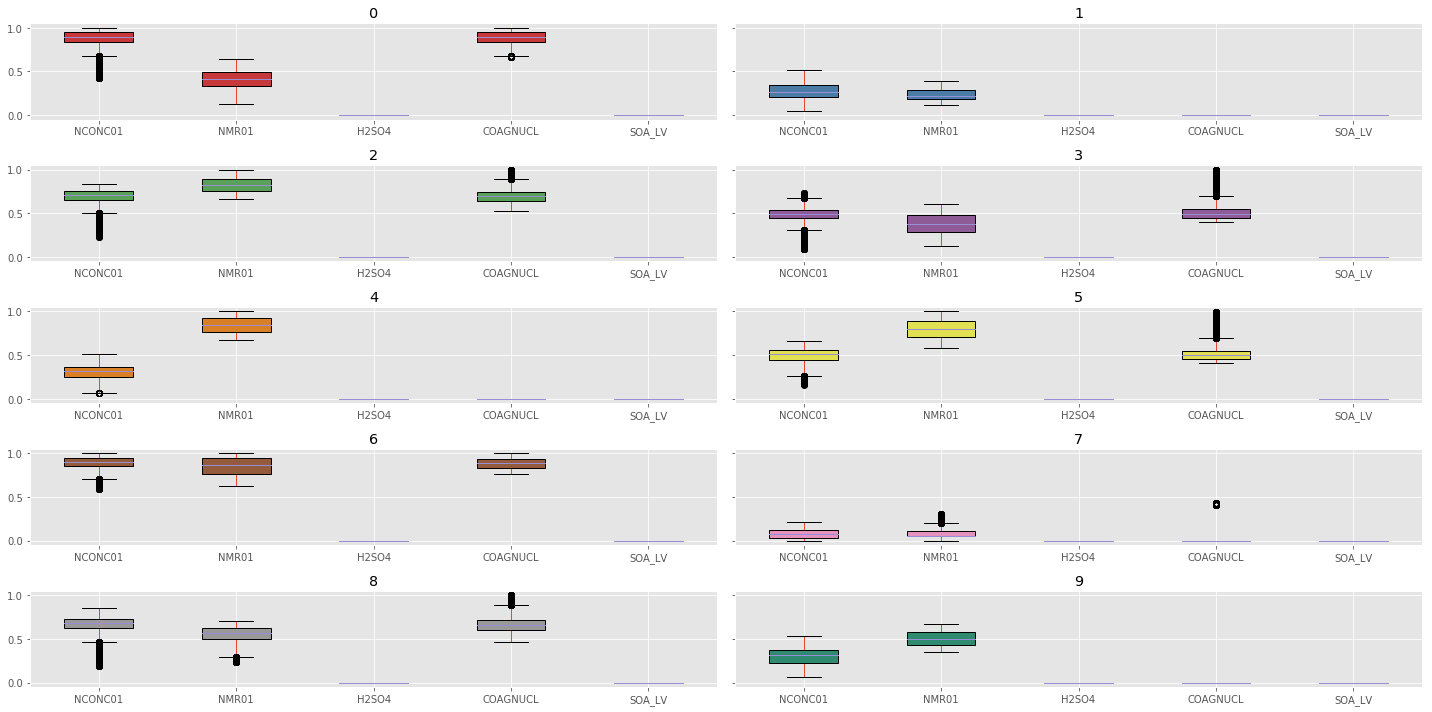

In [18]:
res = _df.groupby(la).boxplot(layout=(5,2),figsize=(20,10),return_type='both',patch_artist = True,);
plt.gcf().tight_layout()
_i = 0
for row_key, (ax,row) in res.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(ucp.cc[_i])
        box.set_edgecolor('k')
    _i +=1

In [19]:
ds2 = df2.to_xarray() 

In [20]:
_la = ds2[la].astype(int)
bb = (_la<=n_c) & (_la>=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
ds2[la]=_la.where(bb).astype('int32')

In [22]:
tot100 = df2[la].count()/100

In [23]:
mkrs = mpl.lines.Line2D.filled_markers

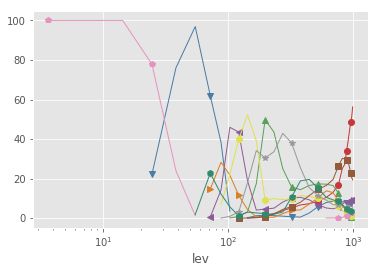

In [24]:
_df = df2.reset_index()[[lev,la,cols[0]]]
_d1 =_df
_d2 = _d1.groupby([lev,la]).count()
_d2 = _d2.unstack(la)[cols[0]].T/_d2.unstack(la).sum(axis=1) * 100
_d3 = _d2.T
_d3 = _d3.sort_index()
# ax = _d3.plot.area(color = ucp.cc,legend=False)
ax = _d3.plot.line(color = ucp.cc,legend=False,linewidth=1)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(mkrs[i])
    line.set_markevery(3)
ax.set_xscale('log')

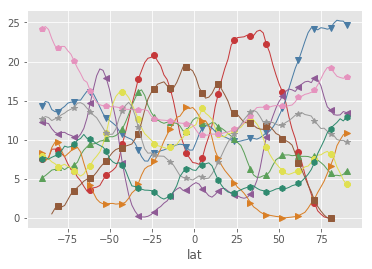

In [25]:
_df = df2.reset_index()[[lat,la,cols[0]]]
_d1 =_df
_d2 = _d1.groupby([lat,la]).count()
_d2 = _d2.unstack(la)[cols[0]].T/_d2.unstack(la).sum(axis=1) * 100
_d3 = _d2.T
_d3 = _d3.sort_index()
# ax = _d3.plot.area(color = ucp.cc,legend=False)
ax = _d3.plot.line(color = ucp.cc,legend=False,linewidth=1)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(mkrs[i])
    line.set_markevery(5)

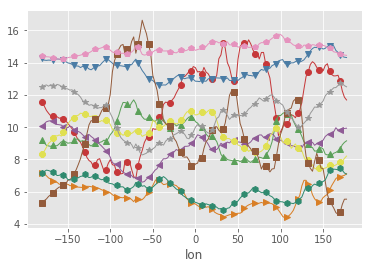

In [26]:
_df = df2.reset_index()[[lon,la,cols[0]]]
_d1 =_df
_d2 = _d1.groupby([lon,la]).count()
_d2 = _d2.unstack(la)[cols[0]].T/_d2.unstack(la).sum(axis=1) * 100
_d3 = _d2.T
_d3 = _d3.sort_index()
ax = _d3.plot.line(color = ucp.cc,legend=False,linewidth=1,marker='d')
for i, line in enumerate(ax.get_lines()):
    line.set_marker(mkrs[i])
    line.set_markevery(5)

In [30]:
df.reset

NCONC01      NMR01         H2SO4  \
lat   lev        lon    time                                             
-90.0 3.643466   -180.0 2008-01-17   0.014729  12.000000  4.617619e-18   
                        2008-02-15   0.007353  12.000000  4.510534e-18   
                        2008-03-17   0.003771  12.000000  4.763154e-18   
                        2008-04-16   0.002279  12.000000  5.380424e-18   
                        2008-05-17   0.002522  12.000000  5.110385e-18   
                        2008-06-16   0.020549  12.000000  3.516833e-18   
                        2008-07-17   0.021282  12.000000  5.001423e-18   
                        2008-08-17   0.016164  12.000000  1.005000e-17   
                        2008-09-16   0.028563  12.000000  1.577972e-17   
                        2008-10-17   0.086825  12.000000  1.652989e-17   
                        2008-11-16   0.066687  12.000000  1.388823e-17   
                        2008-12-17   0.036721  12.000000  1.172538e-17   
                 -177.5 2008-01-17   0.014729  12.000000  4.617619e-18   
                        2008-02-15   0.007353  12.000000  4.510534e-18   
                        2008-03-17   0.003771  12.000000  4.763154e-18   
                        2008-04-16   0.002279  12.000000  5.380424e-18   
                        2008-05-17   0.002522  12.000000  5.110385e-18   
                        2008-06-16   0.020549  12.000000  3.516833e-18   
                        2008-07-17   0.021282  12.000000  5.001423e-18   
                        2008-08-17   0.016164  12.000000  1.005000e-17   
                        2008-09-16   0.028563  12.000000  1.577972e-17   
                        2008-10-17   0.086825  12.000000  1.652989e-17   
                        2008-11-16   0.066687  12.000000  1.388823e-17   
                        2008-12-17   0.036721  12.000000  1.172538e-17   
                 -175.0 2008-01-17   0.014729  12.000000  4.617619e-18   
                        2008-02-15   0.007353  12.000000  4.510534e-18   
                        2008-03-17   0.003771  12.000000  4.763154e-18   
                        2008-04-16   0.002279  12.000000  5.380424e-18   
                        2008-05-17   0.002522  12.000000  5.110385e-18   
                        2008-06-16   0.020549  12.000000  3.516833e-18   
...                                       ...        ...           ...   
 90.0 992.556095  172.5 2008-07-17  14.926248  32.456543  9.940531e-15   
                        2008-08-17  19.368704  27.597595  7.745022e-15   
                        2008-09-16   4.842684  22.362690  6.206857e-15   
                        2008-10-17   0.280080  18.437885  1.182847e-15   
                        2008-11-16   0.565224  20.257740  1.582400e-15   
                        2008-12-17   0.947737  18.270782  2.596402e-15   
                  175.0 2008-01-17   0.970730  17.323141  3.850353e-15   
                        2008-02-15   1.867468  16.582310  4.054942e-15   
                        2008-03-17   8.996061  17.917761  8.792239e-15   
                        2008-04-16  24.739330  23.198933  2.142517e-14   
                        2008-05-17  26.399937  24.329275  2.454165e-14   
                        2008-06-16   5.687994  25.903614  1.020436e-14   
                        2008-07-17  14.926003  32.456238  9.940279e-15   
                        2008-08-17  19.368004  27.598005  7.742299e-15   
                        2008-09-16   4.842684  22.362690  6.206786e-15   
                        2008-10-17   0.280080  18.437885  1.182848e-15   
                        2008-11-16   0.565224  20.257740  1.582400e-15   
                        2008-12-17   0.947737  18.270782  2.596402e-15   
                  177.5 2008-01-17   0.970730  17.323141  3.850356e-15   
                        2008-02-15   1.867468  16.582310  4.054941e-15   
                        2008-03-17   8.996061  17.917761  8.792241e-15   
                        2008-04-16  24.739

In [34]:
_df1 = _df.groupby([la,time]).count()[cols[0]].unstack(la)

ax=_df1.plot.line(color=ucp.cc,legend=False)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(mkrs[i])
    line.set_markevery(1)

KeyError: 'time'

In [ ]:
import cartopy.crs as ccrs
fig,axs = plt.subplots(4,3,subplot_kw={'projection':ccrs.PlateCarree()},figsize=np.array([4.5*3,2*4]))
axf = axs.flatten()
for il in range(n_c):
    col = ucp.cc[il]
    _ds = ds2.where(ds2[la]==il)
    cm = ucp.create_cmap_from_color(col)
#     fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},figsize=(4.5,2))
    ax = axf[il]
    _ds1=_ds[la].count([lev,time])/ds2[la].count([lev,time])*100
    _ds1.plot(ax=ax, transform=ccrs.PlateCarree(),cmap=cm)
    ax.set_global(); ax.coastlines();

In [ ]:
_df = df2.reset_index()[[time,la,cols[0]]]
# _df1 = df2.reset_index().set_index(time)[la]
# _df = _df.resample('M').count()#/_df1.resample('M').count()*100
# _df.plot(color=[col],linewidth=2)